# <span style="color:rgb(255, 0, 255)">Code for the mid-projet Tapas group. Modeling</span> 

## 0 | Define the problem </span>

We (Ricardo, Carlos and Nara) are working as data analysts for a real estate company. Our company wants to build a **machine learning model** to predict the **selling prices of houses** based on a variety of features on which the value of the house is evaluated.

**Objective**

Our job is to build a model that will predict the price of a house based on features provided in the dataset. 

Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above. **This will be analyzed through SQL.

## 1 | Gather data </span>

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [2]:
data = pd.read_excel('regression_data.xls')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## 2 | Pre-process data </span>

### <span style="color:rgb(255, 0, 255)">--- First explorations (head, shape, info).

In [3]:
data.shape

(21597, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [7]:
# Let's see nans
data.isna().sum() 
#There are none! (haha)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

***

### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

In [8]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### <span style="color:rgb(255, 0, 255)">--- Check for the kind of features that we have</span>

<span style="color:rgb(255, 0, 255)">They are not categorical values, lets explore each column to know how to treat them (specially the discrete ones)</span>

In [9]:
for col in data.columns:
    print(data[col].value_counts())

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathro

In [10]:
#Inspired by Luis's Code
#Check unique values for each value
for column in data.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", data[column].nunique(), " categories \n The single values are: ", data[column].unique(),"\n" )
    print("Here the detail: \n" , data[column].value_counts())
    print("\n\n")

──────────
This feature  id  has  21420  categories 
 The single values are:  [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157] 

Here the detail: 
 795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64



──────────
This feature  date  has  372  categories 
 The single values are:  ['2014-10-13T00:00:00.000000000' '2014-12-09T00:00:00.000000000'
 '2015-02-25T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-01-15T00:00:00.000000000' '2015-04-15T00:00:00.000000000'
 '2015-03-12T00:00:00.000000000' '2015-04-03T00:00:00.000000000'
 '2014-05-27T00:00:00.000000000' '2014-05-28T00:00:00.000000000'
 '2014-10-07T00:00:00.000000000' '2015-01-24T00:00:00.000000000'
 '2014-07-31T00:00:00.000000000' '2014-05-29T00:00:00.000000000'
 '2014-12-05T0

#### <span style="color:rgb(255, 0, 255)"> **Continous**
    Nominal
        
        sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15.
        
    Ordinal
        yr_built, yr_renovated, zipcode, price (target), month_bought, year_bought
    
#### <span style="color:rgb(255, 0, 255)"> **Discrete** 
    
    Bedrooms, bathrooms, floors, waterfront, view, condition, grade
    
#### <span style="color:rgb(255, 0, 255)"> **Categoricals** 
    
None

***

### <span style="color:rgb(255, 0, 255)">--- Data cleaning: </span>

#### <span style="color:rgb(255, 0, 255)"> Put the columns names on point:

In [11]:
data.columns
# they look pretty fine

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

#### <span style="color:rgb(255, 0, 255)">Drop columns that we don't longer need:

In [12]:
df = data.copy() # for that we are using df as a table to do all the changes
df = df.drop(['id'], axis=1)
df.head() #we don't need "id" for the model because is an ID

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### <span style="color:rgb(255, 0, 255)">--- Visualize values

</span>

<span style="color:rgb(255, 0, 255)"> To not saturate this notebook we have created another notebook for the data vizualization.

In [13]:
# For that, we are saving the csv that we have at this point:
df.to_csv('for_data_viz.csv', index=False)

### <span style="color:rgb(255, 0, 255)">--- Remove outliers</span>

<span style="color:rgb(255, 0, 255)"> In the first try we didn't remove outliers and it gave us a R2 of 0.68 in the linnear regression model. To revisit this try please check Vol 1. of the try-and-errors folder. After a little bit (too much) of trying with outliers, **the outliers' cleaning that afected the best to the model was removing only the outliers of sqft_lot and sqft_lot15**.

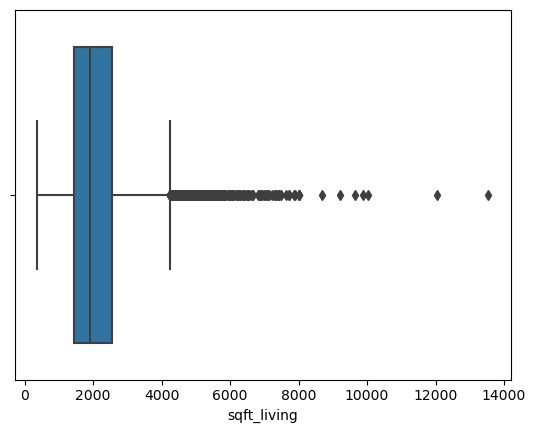

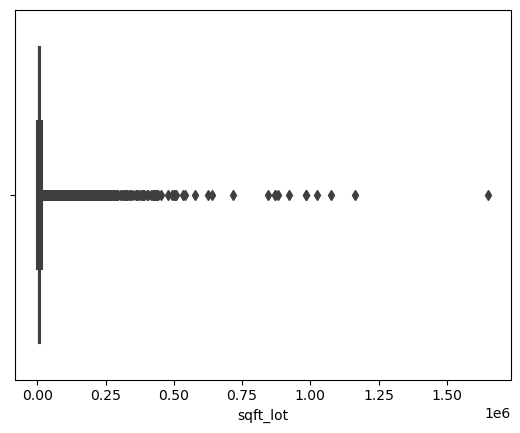

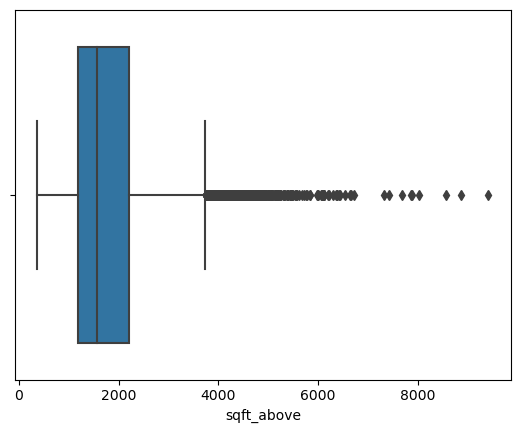

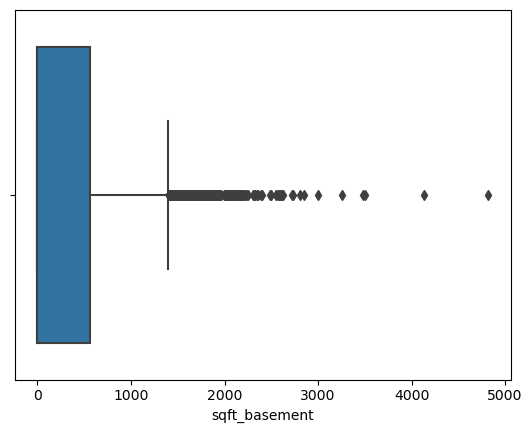

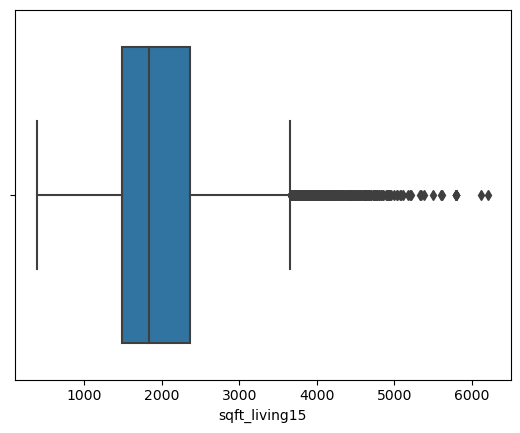

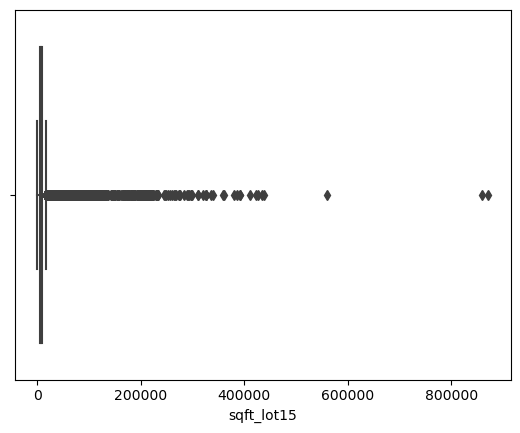

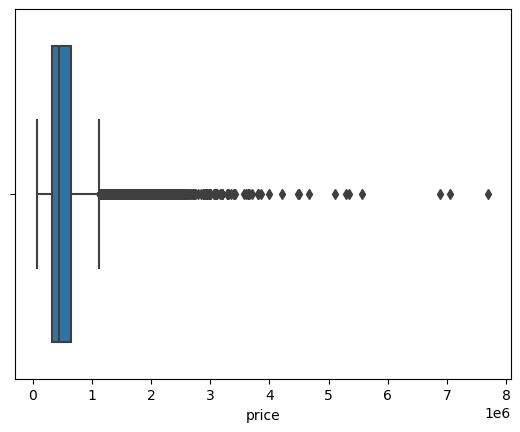

In [14]:
#Create a group of boxplots
cont = df[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "price"]]
for i, col in enumerate(cont.columns):
    plt.figure(i)
    sns.boxplot(x=cont[col] ,whis=1.5)

In [15]:
#Remove outliers sqft_lot
iqr = np.percentile(df['sqft_lot'],75) - np.percentile(df['sqft_lot'],25)
upper_limit = np.percentile(df['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_lot'],25) - 1.5*iqr
df = df[(df['sqft_lot']>lower_limit) & (df['sqft_lot']<upper_limit)]
df.shape

(19178, 20)

In [16]:
#Remove outliers sqft_lot15
iqr = np.percentile(df['sqft_lot15'],75) - np.percentile(df['sqft_lot15'],25)
upper_limit = np.percentile(df['sqft_lot15'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_lot15'],25) - 1.5*iqr
df = df[(df['sqft_lot15']>lower_limit) & (df['sqft_lot15']<upper_limit)]
df.shape

(18623, 20)

### <span style="color:rgb(255, 0, 255)">--- Feature engineering:

#### <span style="color:rgb(255, 0, 255)"> 1. Create columns for year, month, day so we can use this info for the model:

In [17]:
df['day_bought']=data['date'].dt.day
df['month_bought']=data['date'].dt.month
df['year_bought']=data['date'].dt.year

In [18]:
#let's drop date because we already have that info in the new columns created
df = df.drop('date', axis=1) 

#### <span style="color:rgb(255, 0, 255)"> 2. Create a column for the difference between the year it was built and the year it was renovated:

In [19]:
df["yr_diff_renovated"] = df["yr_renovated"] - df["yr_built"]

#### <span style="color:rgb(255, 0, 255)"> 3. Create a column for the difference between the year it was bought and the year it was built:

In [20]:
df["yr_diff_bought"] = df["year_bought"] - df["yr_built"]

#### <span style="color:rgb(255, 0, 255)"> 4. Create a column for the difference between the square ft in total and the square ft that are built for living:

In [21]:
df["sqft_diff"] = df["sqft_lot"] - df["sqft_living"]

#### <span style="color:rgb(255, 0, 255)"> 5. The same but for the renovation in 2015:

In [22]:
df["sqrt_diff_15"] = df["sqft_lot15"] - df["sqft_living15"]

#### <span style="color:rgb(255, 0, 255)">  6. Create a column for whether it has basement or not:

In [23]:
df["basement_binary"] = df["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

#### <span style="color:rgb(255, 0, 255)">  7. Encode Zipcode to create new column of regions:

<span style="color:rgb(255, 0, 255)"> In Tableau we saw that this dataset corresponds to the State of Washington and to two different regions, thats why some houses have the zipcode starting with "980" and some with "981". We create a column differenting each region.  

In [24]:
def zip_to_binary(zipcode):
    if str(zipcode).startswith('980'):
        return 0
    elif str(zipcode).startswith('981'):
        return 1
    else:
        return None

df['zipcode_binary'] = df['zipcode'].apply(zip_to_binary)

In [25]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day_bought,month_bought,year_bought,yr_diff_renovated,yr_diff_bought,sqft_diff,sqrt_diff_15,basement_binary,zipcode_binary
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,13,10,2014,-1955,59,4470,4310,0,1
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,9,12,2014,40,63,4672,5949,1,1
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,25,2,2015,-1933,82,9230,5342,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,9,12,2014,-1965,49,3040,3640,1,1
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,18,2,2015,-1987,28,6400,5703,0,0


#### <span style="color:rgb(255, 0, 255)">  8. Whether it has been renovated or not:

In [26]:
df["renovated_yes_no"]= df["yr_diff_renovated"].apply(lambda x: 1 if x>0 else 0)

### <span style="color:rgb(255, 0, 255)"> --- Feature selection

</span>

<span style="color:rgb(255, 0, 255)"> The goal of feature selection is to improve model accuracy by reducing the number of irrelevant or redundant features that may introduce noise or bias in the model. **For that, we studied the effect of bucketing some numerical discrete features and it didn't have any effect in the model.** To review this try visit Vol.2 of the try-and-errors folder.

##  3 | Prepare the data for the model </span>

### <span style="color:rgb(255, 0, 255)">--- Transforming Skewed data with log transformation

<span style="color:rgb(255, 0, 255)"> In the data viz notebook you can see that: sqft_living, sqft_above and sqft_living15 are really skewed.

In [27]:
# sqft_living, sqft_above, sqft_living15
df["sqft_living_log"] = np.log((df.sqft_living))
df["sqft_above_log"] = np.log((df.sqft_above))
df["sqft_living15_log"] = np.log((df.sqft_living15))


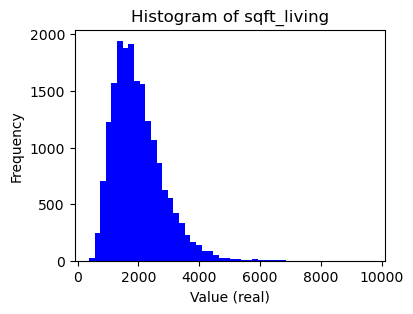

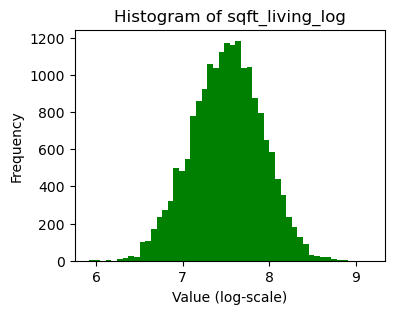

In [28]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living, bins=50, color='blue')
plt.title('Histogram of sqft_living')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living_log, bins=50, color='green')
plt.title('Histogram of sqft_living_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


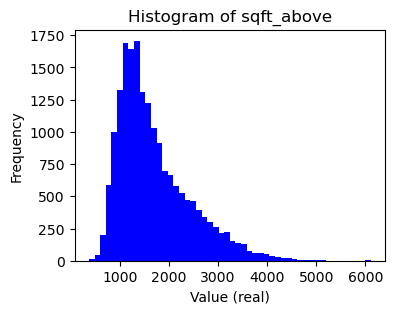

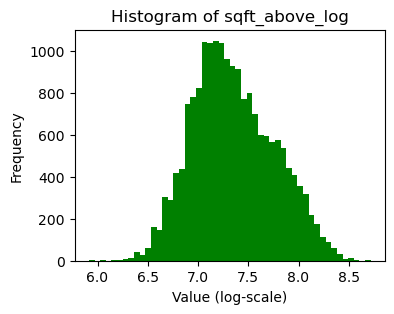

In [29]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above, bins=50, color='blue')
plt.title('Histogram of sqft_above')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_above_log, bins=50, color='green')
plt.title('Histogram of sqft_above_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


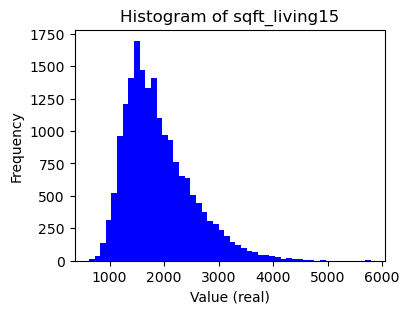

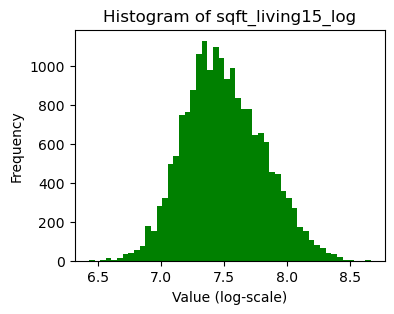

In [30]:
fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15, bins=50, color='blue')
plt.title('Histogram of sqft_living15')
plt.xlabel('Value (real)')
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(4, 3))
plt.hist(df.sqft_living15_log, bins=50, color='green')
plt.title('Histogram of sqft_living15_log')
plt.xlabel('Value (log-scale)')
plt.ylabel('Frequency')
plt.show()


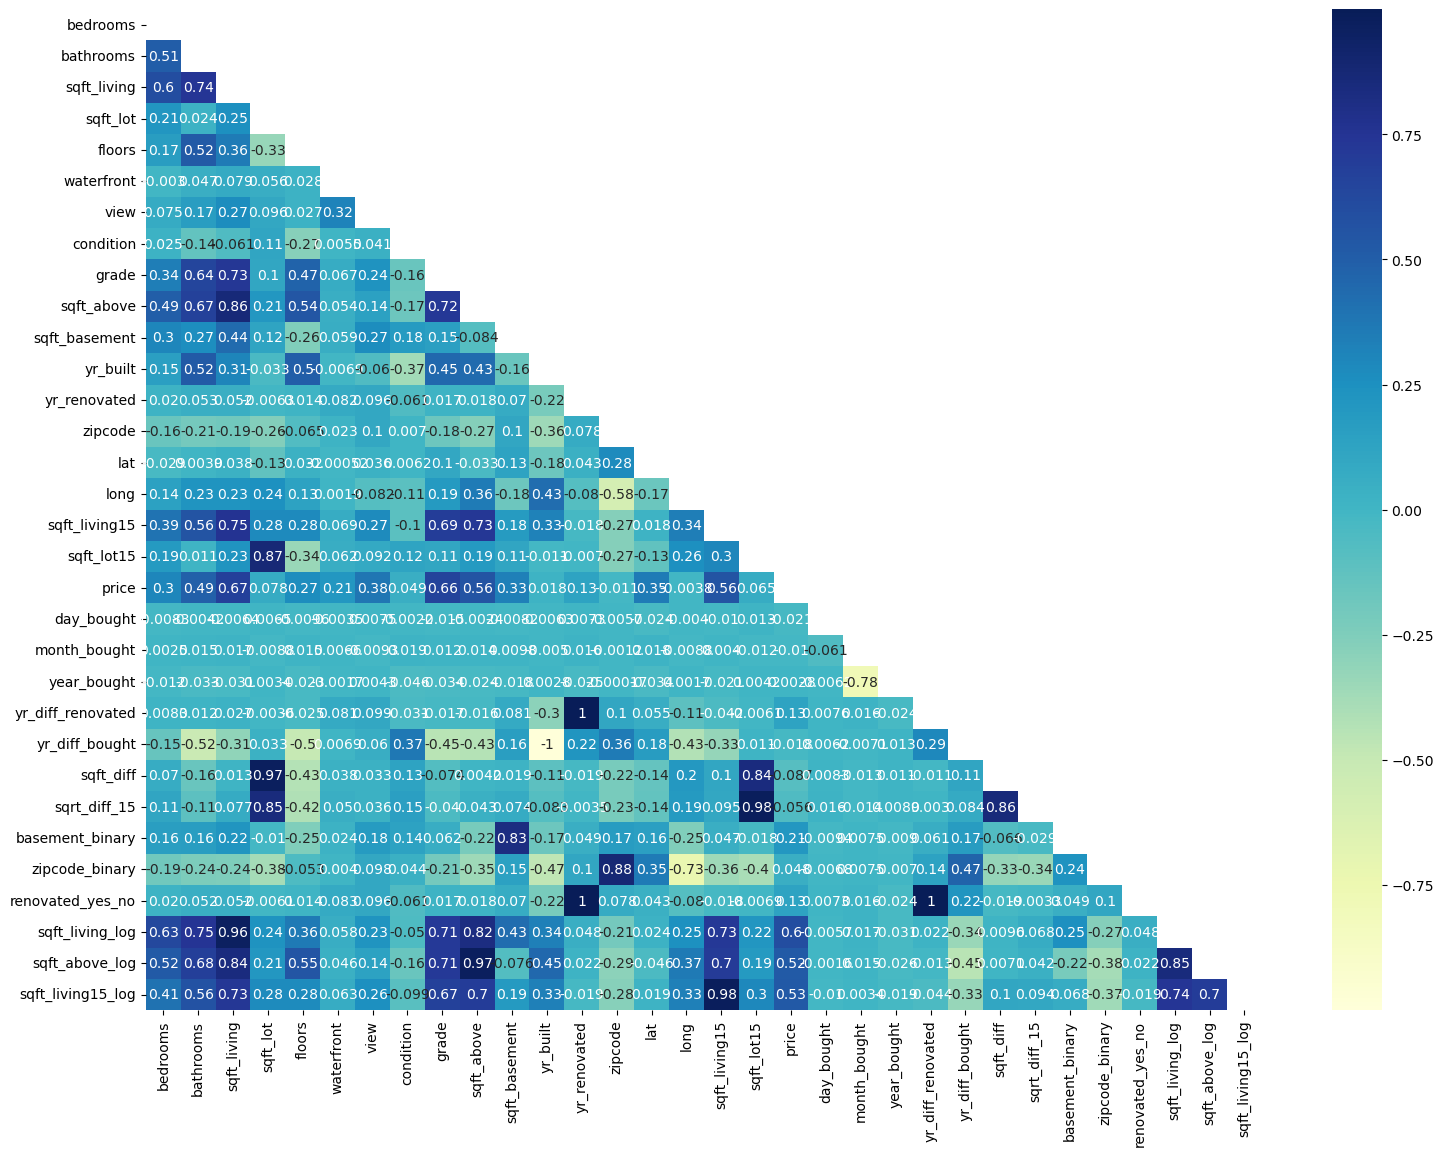

In [31]:
# let's study the correlation again with new columns
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

plt.show()

<span style="color:rgb(255, 0, 255)"> sqft_living_log is highly correlated with sqft_living (obviously), bedrooms, bathrooms, sqft_above, sqft_living15, sqft_living15_log, grade

### <span style="color:rgb(255, 0, 255)">--- Treat some discrete numericals as categoricals and one hot encoding them

In [33]:
# select the columns we want to encode
df_binary = df[["waterfront", "year_bought", "renovated_yes_no", "basement_binary", "zipcode_binary"]]
df_binary.head()


,waterfront,year_bought,renovated_yes_no,basement_binary,zipcode_binary
0,0,2014,0,0,1
1,0,2014,1,1,1
2,0,2015,0,0,0
3,0,2014,0,1,1
4,0,2015,0,0,0


In [35]:
waterfront_enc = df['waterfront']
waterfront_enc_dumm = pd.get_dummies(waterfront_enc, drop_first=False)
waterfront_enc_dumm

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [36]:
year_bought_enc = df['year_bought']
year_bought_enc_dumm = pd.get_dummies(year_bought_enc, drop_first=False)
year_bought_enc_dumm

,2014,2015
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
21592,1,0
21593,0,1
21594,1,0
21595,0,1


In [38]:
yr_renovated_binary_enc = df['renovated_yes_no']
yr_renovated_binary_enc_dumm = pd.get_dummies(yr_renovated_binary_enc, drop_first=False)
yr_renovated_binary_enc_dumm

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [40]:
basement_binary_enc = df['basement_binary']
basement_binary_enc_dumm = pd.get_dummies(basement_binary_enc, drop_first=False)
basement_binary_enc_dumm

,0,1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [42]:
zip_binary_enc = df['zipcode_binary']
zip_binary_enc_dumm = pd.get_dummies(zip_binary_enc, drop_first=False)
zip_binary_enc_dumm

,0,1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
21592,0,1
21593,0,1
21594,0,1
21595,1,0


In [43]:
df_binary_encoded = pd.concat([waterfront_enc_dumm, year_bought_enc_dumm, yr_renovated_binary_enc_dumm, basement_binary_enc_dumm, zip_binary_enc_dumm], axis=1)
df_binary_encoded.head()

,0,1,2014,2015,0,1,0,1,0,1
0,1,0,1,0,1,0,1,0,0,1
1,1,0,1,0,0,1,0,1,0,1
2,1,0,0,1,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,0,1
4,1,0,0,1,1,0,1,0,1,0


In [44]:
# Concat the one-hot encoded columns with the original dataframe
df = pd.concat([df, df_binary_encoded], axis=1)

In [45]:
df.isna().sum()

bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price                0
day_bought           0
month_bought         0
year_bought          0
yr_diff_renovated    0
yr_diff_bought       0
sqft_diff            0
sqrt_diff_15         0
basement_binary      0
zipcode_binary       0
renovated_yes_no     0
sqft_living_log      0
sqft_above_log       0
sqft_living15_log    0
0                    0
1                    0
2014                 0
2015                 0
0                    0
1                    0
0                    0
1                    0
0                    0
1                    0
dtype: int64

### <span style="color:rgb(255, 0, 255)">--- Scaling

In [52]:
X_num = df.copy()
X_num = X_num.drop("price", axis = 1)
X_num.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                'sqft_lot',            'floors',        'waterfront',
                    'view',         'condition',             'grade',
              'sqft_above',     'sqft_basement',          'yr_built',
            'yr_renovated',           'zipcode',               'lat',
                    'long',     'sqft_living15',        'sqft_lot15',
              'day_bought',      'month_bought',       'year_bought',
       'yr_diff_renovated',    'yr_diff_bought',         'sqft_diff',
            'sqrt_diff_15',   'basement_binary',    'zipcode_binary',
        'renovated_yes_no',   'sqft_living_log',    'sqft_above_log',
       'sqft_living15_log',                   0,                   1,
                      2014,                2015,                   0,
                         1,                   0,                   1,
                         0,                   1],
      dtype='object')

In [53]:
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 41)

### <span style="color:rgb(255, 0, 255)">--- Test split


In [55]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

##  4 | Modeling </span>

### <span style="color:rgb(255, 0, 255)">--- Function for the model


In [66]:
def modeling(y, X, models=[], test_size=0.25):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", r2), print("R2 adjusted =", r2_adj), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

### <span style="color:rgb(255, 0, 255)">--- Trying different models


In [67]:

predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7343411852314154
R2 adjusted = 0.7369871623167088
RMSE = 152587.82
MSE = 23283043165.25
MAE = 103306.6
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7404367168749211
R2 adjusted = 0.7685131432931124
RMSE = 150827.1
MSE = 22748814604.1
MAE = 89907.76
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7976882593024983
R2 adjusted = 0.8905056447810316
RMSE = 133158.32
MSE = 17731137570.57
MAE = 77990.84
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8743583080506373
R2 adjusted = 0.9186964303093066
RMSE = 104936.03
MSE = 11011571137.06
MAE = 64568.14


##  5 | Evaluating the model </span>

In [62]:
# Coefficient values

reg = LinearRegression()
reg.fit(X_train, y_train)

# Get the coefficients and feature names
coef = reg.coef_
feature_names = df.columns

# Print the coefficients and feature names
for feature, coef in zip(feature_names, coef):
    print(f"{feature}: {coef:.2f}")
    
# high negative of positive coef: bedrooms,sqft_living, sqft_lot, floors, waterfront, view, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, sqft_lot15, day_bought, year_bought, yr_diff_renovated, yr_diff_bought, sqrt_diff, sqrt_diff_15, yr_renovated_binary     

bedrooms: -342496.55
bathrooms: 250086.55
sqft_living: 1681408202161826.75
sqft_lot: -9422281757100216.00
floors: -4396.05
waterfront: 357866915123906.25
view: 167058.88
condition: 148805.72
grade: 1028511.67
sqft_above: 1863326328280077.25
sqft_basement: 1564674721845807.25
yr_built: 1648149184839040512.00
yr_renovated: -41756144578430592.00
zipcode: -252503.41
lat: 328825.60
long: 25357.23
sqft_living15: -8470460707589377.00
sqft_lot15: 23913896419377544.00
price: -8045.32
day_bought: -4301.31
month_bought: 5409429907010731.00
year_bought: 44118526959678976.00
yr_diff_renovated: 1660077089202951680.00
yr_diff_bought: 9860480350160330.00
sqft_diff: -25467087280321664.00
sqrt_diff_15: -1923676737393233.00
basement_binary: 2242943823127274.50
zipcode_binary: 7157675639103922.00
renovated_yes_no: -1953150.84
sqft_living_log: 606901.87
sqft_above_log: 142839.44
sqft_living15_log: 500812967654485.56
0: 142946053115390.22
1: 9860219648331286.00
2014: -9860219648331286.00
2015: 7775528356613

In [64]:
 #let's dive in feature importance of linnear regression model

X_feature = X
y_feature = Y

# create a linear regression object
reg = LinearRegression()

# fit the linear regression model on the data
reg.fit(X_feature, y_feature)

# print the coefficients and their corresponding feature names
coefficients = pd.DataFrame({'feature': X_feature.columns, 'coefficient': reg.coef_})
coefficients = coefficients.sort_values('coefficient', ascending=False)
print(coefficients)


              feature   coefficient
22     yr_diff_bought  1.885787e+18
11           yr_built  1.872116e+18
21  yr_diff_renovated  4.786771e+16
17         sqft_lot15  2.461108e+16
3            sqft_lot  2.077266e+16
2         sqft_living  1.542185e+16
38                  1  1.465224e+16
37                  0  1.208309e+16
32                  1  1.841949e+14
8               grade  1.014573e+06
29     sqft_above_log  5.534857e+05
14                lat  3.292928e+05
1           bathrooms  2.221630e+05
6                view  1.778496e+05
7           condition  1.619383e+05
30  sqft_living15_log  1.445997e+05
15               long  1.514783e+04
19       month_bought  5.163495e+03
4              floors  2.517572e+02
18         day_bought -6.826348e+03
13            zipcode -2.430364e+05
0            bedrooms -3.671196e+05
28    sqft_living_log -1.869875e+06
36                  1 -1.323982e+15
27   renovated_yes_no -1.398031e+15
31                  0 -2.565155e+15
25    basement_binary -2.569

### <span style="color:rgb(255, 0, 255)"> ❌ Second try


In [73]:
# sqft_living, sqft_above, sqft_living15, waterfront, year_bought, renovated_yes_no, basement_binary, zipcode_binary
X_num2 = df.copy()
X_num2 = X_num2.drop(columns = ["sqft_living", "sqft_above", "sqft_living15", "waterfront", "year_bought", "renovated_yes_no", "basement_binary", "zipcode_binary"], axis = 1)
X_num2 = X_num2.drop("price", axis = 1)

In [74]:
transformer = MinMaxScaler().fit(X_num2)
X_num_minmax = transformer.transform(X_num2)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num2.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 33)

In [75]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [76]:

predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7338849462005318
R2 adjusted = 0.7368082193394168
RMSE = 152718.79
MSE = 23323029164.05
MAE = 103700.83
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.728798808438464
R2 adjusted = 0.7561957912998565
RMSE = 154171.31
MSE = 23768791768.1
MAE = 92008.86
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7933064121103729
R2 adjusted = 0.8895734480094083
RMSE = 134592.62
MSE = 18115174280.99
MAE = 77731.9
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8722058333325398
R2 adjusted = 0.918650943781066
RMSE = 105831.09
MSE = 11200219730.63
MAE = 64745.33


### <span style="color:rgb(255, 0, 255)"> ❌Third try

In [77]:
# sqft_living, sqft_above, sqft_living15, waterfront, year_bought, renovated_yes_no, basement_binary, zipcode_binary
X_num3 = df.copy()
X_num3 = X_num3.drop(columns = ["price", "long", "zipcode","sqft_living", "sqft_above", "sqft_living15", "waterfront", "year_bought", "renovated_yes_no", "basement_binary", "zipcode_binary"], axis = 1)

In [78]:
transformer = MinMaxScaler().fit(X_num3)
X_num_minmax = transformer.transform(X_num3)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num3.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 31)

In [79]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [80]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7249314058002456
R2 adjusted = 0.7280555383965721
RMSE = 155266.68
MSE = 24107741193.29
MAE = 104687.31
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7097783726888536
R2 adjusted = 0.7459217480612299
RMSE = 159486.03
MSE = 25435793207.39
MAE = 94782.09
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7507146994025287
R2 adjusted = 0.8651307576968844
RMSE = 147810.77
MSE = 21848024953.85
MAE = 85053.91
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.843250652025093
R2 adjusted = 0.9022110516013208
RMSE = 117208.91
MSE = 13737928621.73
MAE = 71575.16


### <span style="color:rgb(255, 0, 255)"> ❌Fourth try

In [85]:
# sqft_living, sqft_above, sqft_living15, waterfront, year_bought, renovated_yes_no, basement_binary, zipcode_binary
X_num4 = df.copy()
X_num4 = X_num4.drop(columns = ["price", "sqft_living", "sqft_above", "sqft_living15", "sqft_lot", "sqft_lot15"], axis = 1)

In [86]:
transformer = MinMaxScaler().fit(X_num4)
X_num_minmax = transformer.transform(X_num4)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num4.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 36)

In [87]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [88]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7050021881819976
R2 adjusted = 0.7059884549088202
RMSE = 160793.01
MSE = 25854390686.02
MAE = 107177.18
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7286552124337589
R2 adjusted = 0.7579170858881964
RMSE = 154212.12
MSE = 23781376902.83
MAE = 90708.2
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.8045537440436836
R2 adjusted = 0.8911661394963442
RMSE = 130879.44
MSE = 17129428277.7
MAE = 77464.55
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8732315669275084
R2 adjusted = 0.9188925459966022
RMSE = 105405.51
MSE = 11110321717.69
MAE = 64949.06


### <span style="color:rgb(255, 0, 255)"> 🟩 Fifth try

In [90]:
# sqft_living, sqft_above, sqft_living15, waterfront, year_bought, renovated_yes_no, basement_binary, zipcode_binary
X_num5 = df.copy()
X_num5 = X_num5.drop(columns = ["price", "sqft_living", "sqft_above", "sqft_living15"], axis = 1)

In [91]:
transformer = MinMaxScaler().fit(X_num5)
X_num_minmax = transformer.transform(X_num5)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num5.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 38)

In [93]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [94]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7342504311126896
R2 adjusted = 0.7369844019135596
RMSE = 152613.88
MSE = 23290997096.93
MAE = 103358.99
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7286054079880251
R2 adjusted = 0.7543416269821706
RMSE = 154226.27
MSE = 23785741896.55
MAE = 92036.76
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.8071171209336094
R2 adjusted = 0.8926311865610506
RMSE = 130018.33
MSE = 16904767127.91
MAE = 77041.42
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.8736773011210203
R2 adjusted = 0.918963737047451
RMSE = 105220.04
MSE = 11071256390.69
MAE = 64805.55


### <span style="color:rgb(255, 0, 255)"> ❌ Sixth try

In [95]:
# sqft_living, sqft_above, sqft_living15, waterfront, year_bought, renovated_yes_no, basement_binary, zipcode_binary
X_num6 = df.copy()
X_num6 = X_num6.drop(columns = ["price", "sqft_living", "sqft_above", "sqft_living15", "yr_built", "yr_renovated"], axis = 1)

In [96]:
transformer = MinMaxScaler().fit(X_num6)
X_num_minmax = transformer.transform(X_num6)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num6.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 36)

In [97]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [98]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.7342455359892416
R2 adjusted = 0.7370219578123516
RMSE = 152615.29
MSE = 23291426118.54
MAE = 103331.73
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.7214315548627136
R2 adjusted = 0.7567052289699229
RMSE = 156251.33
MSE = 24414477412.53
MAE = 91901.28
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.7942433601232578
R2 adjusted = 0.89000234091408
RMSE = 134287.22
MSE = 18033057671.96
MAE = 77659.55
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.874870683788986
R2 adjusted = 0.9189643107953571
RMSE = 104721.85
MSE = 10966665168.32
MAE = 64664.13


### <span style="color:rgb(255, 0, 255)"> ❌ Seventh try

In [99]:
X_num7 = df[["sqft_living_log", "sqft_above_log", "sqft_living15_log", "bedrooms","bathrooms", "grade", "sqft_basement", "yr_built", "view", "floors"]]

In [100]:
transformer = MinMaxScaler().fit(X_num7)
X_num_minmax = transformer.transform(X_num7)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num7.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(18623, 10)

In [101]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [102]:
predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6189419195744261
R2 adjusted = 0.6275017092429143
RMSE = 182748.3
MSE = 33396940894.83
MAE = 126547.62
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.6839274036314926
R2 adjusted = 0.7341657338380506
RMSE = 166437.5
MSE = 27701440703.22
MAE = 115508.34
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.588671997669362
R2 adjusted = 0.7768757361120462
RMSE = 189868.05
MSE = 36049877139.15
MAE = 124128.17
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.7127207298998305
R2 adjusted = 0.8135419418131541
RMSE = 158675.51
MSE = 25177917217.05
MAE = 112085.65
